In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
input=pd.read_csv("/content/sample_data/diabetes.csv")

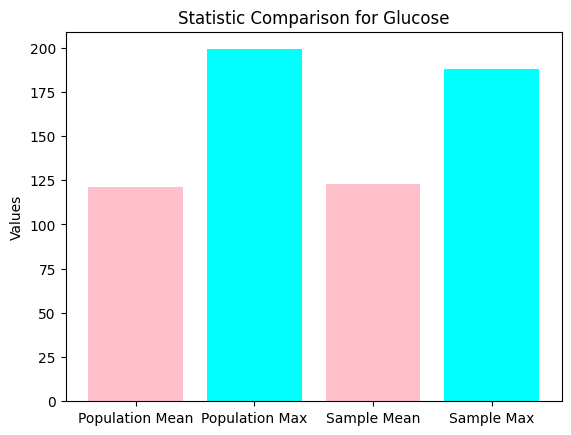

In [4]:

np.random.seed(733)


model = input.sample(25)

mean_glucose_population = input['Glucose'].mean()
max_glucose_population = input['Glucose'].max()

mean_glucose_sample = model['Glucose'].mean()
max_glucose_sample = model['Glucose'].max()


# Create a bar chart for comparison
l = ['Population Mean', 'Population Max', 'Sample Mean', 'Sample Max']
v = [mean_glucose_population, max_glucose_population, mean_glucose_sample, max_glucose_sample]

plt.bar(l, v, color=['pink', 'cyan', 'pink', 'cyan'])
plt.title('Statistic Comparison for Glucose')
plt.ylabel('Values')
plt.show()


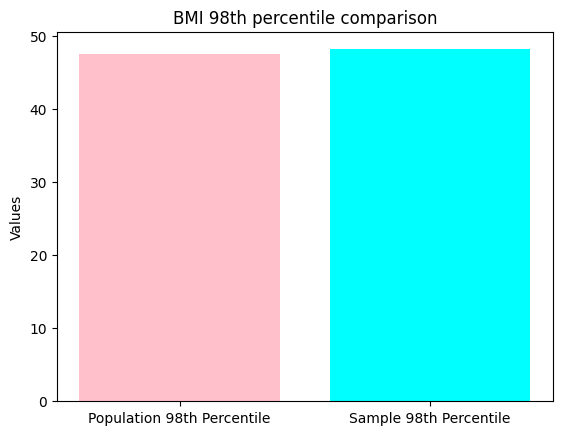

In [5]:
percentile_1 = np.percentile(input['BMI'], 98)
percentile_2 = np.percentile(model['BMI'], 98)

l = ['Population 98th Percentile', 'Sample 98th Percentile']
v = [percentile_1, percentile_2]

plt.bar(l, v, color=['pink', 'cyan'])
plt.title('BMI 98th percentile comparison')
plt.ylabel('Values')
plt.show()

In [12]:

bootstrap_sample1 = 500
sample_size = 150


mean = np.zeros(bootstrap_sample1)
std_dev = np.zeros(bootstrap_sample1)
percentile = np.zeros(bootstrap_sample1)


for i in range(bootstrap_sample1):
    bootstrap_sample2 = input['BloodPressure'].sample(sample_size, replace=True)
    mean[i] = bootstrap_sample2.mean()
    std_dev[i] = bootstrap_sample2.std()
    percentile[i] = np.percentile(bootstrap_sample2, 98)


p1 = input['BloodPressure'].mean()
p2 = input['BloodPressure'].std()
p3 = np.percentile(input['BloodPressure'], 98)


b_mean=np.mean(mean)
b_std_dev=np.mean(std_dev)
b_percentile=np.mean(percentile)


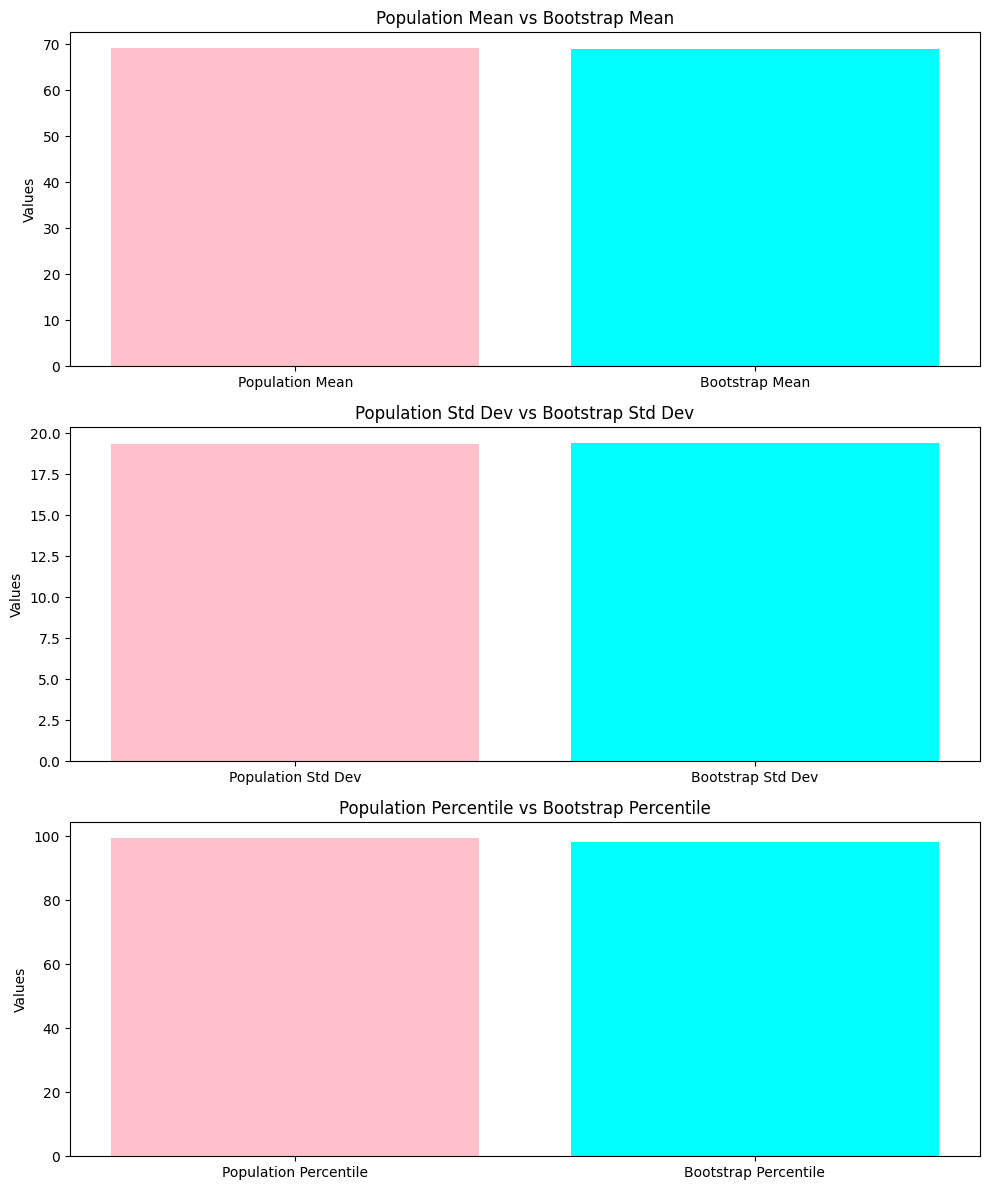

In [13]:
figure, axis = plt.subplots(3, 1, figsize=(10, 12))


axis[0].bar(['Population Mean', 'Bootstrap Mean'], [p1, b_mean], color=['pink', 'cyan'])
axis[0].set_ylabel('Values')
axis[0].set_title('Population Mean vs Bootstrap Mean')


axis[1].bar(['Population Std Dev', 'Bootstrap Std Dev'], [p2, b_std_dev], color=['pink', 'cyan'])
axis[1].set_ylabel('Values')
axis[1].set_title('Population Std Dev vs Bootstrap Std Dev')


axis[2].bar(['Population Percentile', 'Bootstrap Percentile'], [p3, b_percentile], color=['pink', 'cyan'])
axis[2].set_ylabel('Values')
axis[2].set_title('Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()